# mistral-2b-base quick start

本資料は、mistral-2b-baseを簡単に試すためのスクリプトです。  


## 使用環境

- システムRAM:12.7GB
- GPU:T4 GPU

ランタイムのタイプは画面上部の「ランタイム>ランタイムのタイプを変更」より、T4 GPUとしてください。  
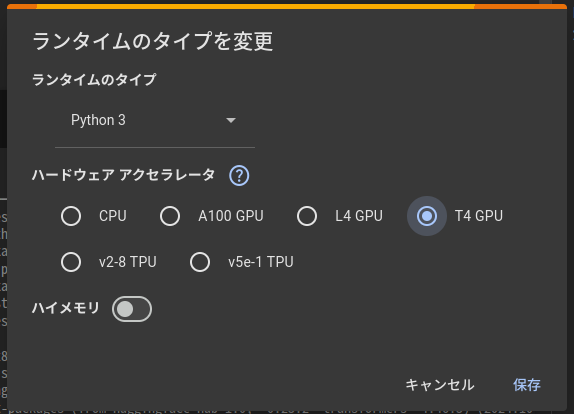

## 環境構築

In [ ]:
%%bash
pip install transformers==4.46.3

## 推論

"prompt="に続く文字を好きな言葉に変更し、実行してみてください。  

In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer
import torch

model_path = "ce-lery/mistral-2b-base"
torch.set_float32_matmul_precision('high')

device = "cuda"
if (device != "cuda" and device != "cpu"):
    device = "cpu"

tokenizer = AutoTokenizer.from_pretrained(model_path,use_fast=False)
model = AutoModelForCausalLM.from_pretrained(model_path,
                                             trust_remote_code=True,
                                             ).to(device)

prompt = "自然言語処理とは、"
inputs = tokenizer(prompt,
                   add_special_tokens=True,
                   return_tensors="pt").to(model.device)
with torch.no_grad():
    outputs = model.generate(
        inputs["input_ids"],
        max_new_tokens=4096,
        do_sample=True,
        early_stopping=False,
        top_p=0.95,
        top_k=50,
        temperature=0.7,
        no_repeat_ngram_size=2,
        num_beams=3
    )

print(outputs.tolist()[0])
outputs_txt = tokenizer.decode(outputs[0])
print(outputs_txt)
